In [3]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import os
import json 
import glob
import seaborn as sns

category = {'Async Music':"Music", 'Boonji Project':"Image", 'Bored Ape Yacht Club':"Image",
            'VeeFriends':"Image", 'CryptoPunks':"Image", 'Doodles':"Image", 'EulerBeats Enigma':"Music",
            'EulerBeats Genesis':"Music", 'Cryptoblots by Dam Aggott-Hnsch':"Image",
            'JingleBe NFT COLLECTION':"Music", 'LOSTPOETS':"Image", 'NAMEWEE4896 Collection':"Music",
            'Nifty Sax Spheres':"Music", 'Rarible':"Marketplace", 'Song A Day':"Video", '"I\'m Spottie"':"Music",
            'SuperRare':"Marketplace", 'THE SHIBOSHIS':"Image"}

df = pd.DataFrame()

for json_files in glob.glob('data\preprocessed\json\*.json'):
    if not df.empty:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = df.append(temp.head(1))
    else:
        temp = pd.read_json(json_files)
        if len(temp) == 2:
            temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
        df = pd.DataFrame(temp.head(1))
df.fillna('',inplace=True)
df = df.astype({"name": str, "description": str, "collection_name": str, "collection_description":str})
df['Category'] = df['collection_name'].apply(lambda x: category.get(x))


In [268]:
df



,name,description,collection_name,collection_description,eth_price,eth_price_decimal,usd_price,usd_volume,usd_marketcap,transaction_time,media_filenames,has_audio_in_video,Category
0,The Song of Nine Paths Silver Edition (Mix: 23...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,3.000000e+17,18,3227,1.32966e+10,3.78559e+11,2021-08-29 11:59:48,"[data/preprocessed/media/tmp/0.jpg, data/prepr...",False,Music
0,The Song of Nine Paths Silver Edition (Mix: 30...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,9.000000e+16,18,2124.78,1.62004e+10,2.48204e+11,2021-07-23 10:16:28,"[data/preprocessed/media/tmp/1.jpg, data/prepr...",False,Music
0,The Song of Nine Paths Silver Edition (Mix: 01...,"I saw a whisper, No matter how I go! Breathles...",Async Music,Create and collect #ProgrammableArt and #Progr...,2.500000e+17,18,2853.14,1.57635e+10,3.35894e+11,2021-09-29 22:00:33,"[data/preprocessed/media/tmp/10.jpg, data/prep...",False,Music
0,BOONJI #1159,"Boonji Project is a collection of 11,111 uniqu...",Boonji Project,"Boonji Project, launched on the Ethereum block...",4.000000e+17,18,3970.18,1.94329e+10,4.68624e+11,2021-10-22 01:52:33,data/preprocessed/media/tmp/100.jpg,False,Image
0,#694,,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,1.300000e+18,18,2643.59,5.36971e+10,3.06684e+11,2021-05-24 13:51:46,data/preprocessed/media/tmp/1000.jpg,False,Image
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,7.500000e+18,18,2724.62,2.50387e+10,3.18706e+11,2021-08-04 19:40:40,data/preprocessed/media/tmp/9995.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,4.400000e+18,18,2025.2,1.74955e+10,2.36545e+11,2021-07-22 14:59:20,data/preprocessed/media/tmp/9996.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,2.900000e+18,18,2517.44,4.19097e+10,2.92557e+11,2021-06-08 15:12:23,data/preprocessed/media/tmp/9997.jpg,False,Image
0,Gracious Grasshopper,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,7.845906e+18,18,3310.5,2.21662e+10,3.87728e+11,2021-08-15 21:20:51,data/preprocessed/media/tmp/9998.jpg,False,Image


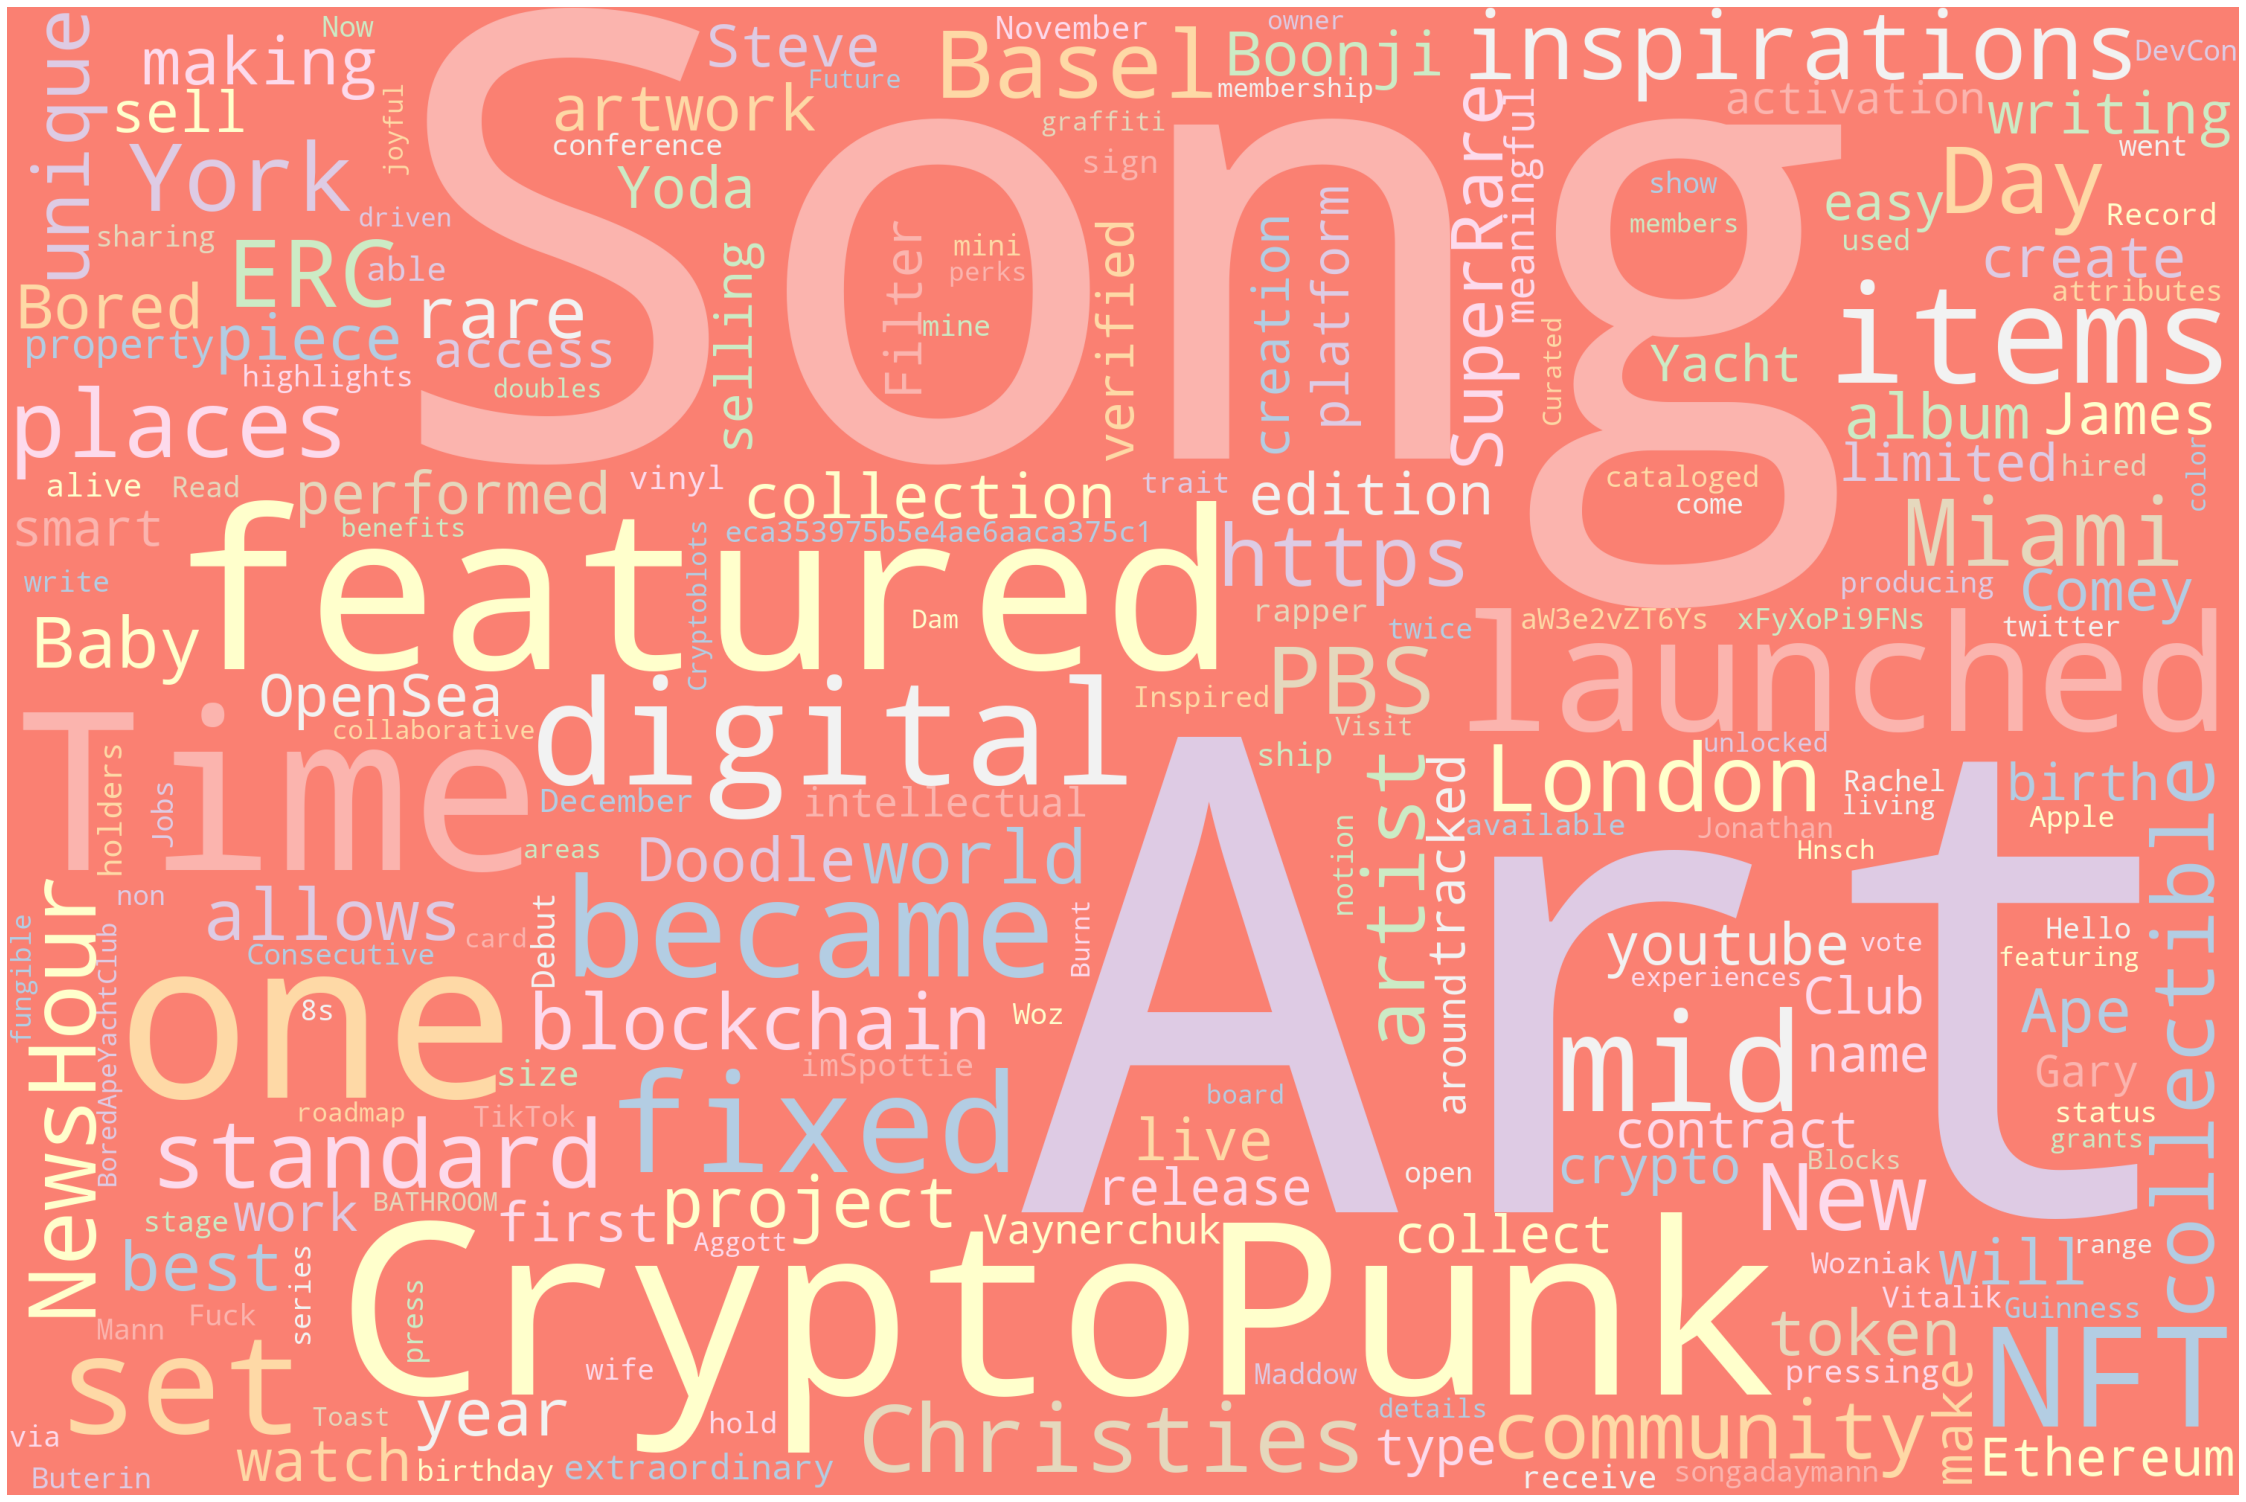

In [211]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
# ' '.join(df.description).replace("https","").replace("f6pXbdBrDkgJjmSV","").replace("QXp2H6Yu0fLSCB0","").replace("XTrDCsS97","").replace("cdn","")
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(df.collection_description))
# Plot
plot_cloud(wordcloud)

In [25]:
profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)

In [28]:
profile.to_notebook_iframe()

Text(0, 0.5, 'Count')

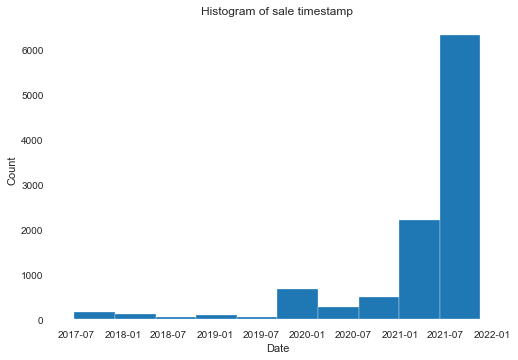

In [218]:
plt.hist(pd.to_datetime(df.transaction_time))
plt.title("Histogram of sale timestamp")
plt.xlabel("Date")
plt.ylabel("Count")

# Format Visualisation

Counter({'.jpg': 8889, '.mp3': 1047, '.mp4': 802, '.gif': 792})


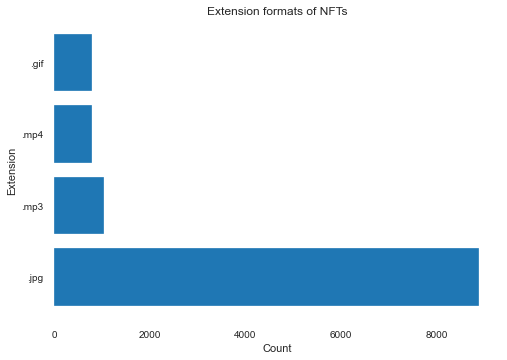

In [29]:
from collections import Counter
contents = []

for key,values in df.media_filenames.iteritems():

    if len(values) == 2: 
        for i in values:
            contents.append(i[-4:])
    else: 
        contents.append(values[-4:])

counter = Counter(contents)
plt.barh(list(counter.keys()),counter.values())
plt.title("Extension formats of NFTs")
plt.xlabel("Count")
plt.ylabel("Extension")
print(counter)

Image          7314
Marketplace    1320
Music          1127
Video           693
Name: Category, dtype: int64


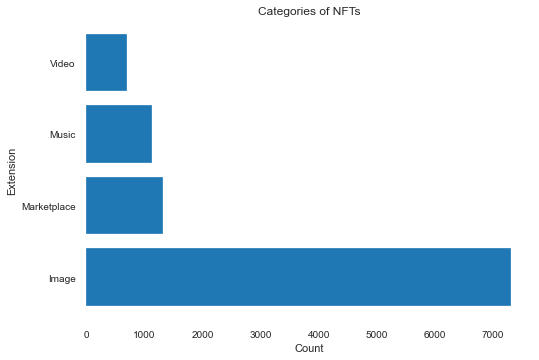

In [269]:
plt.barh(df.Category.value_counts().keys(),df.Category.value_counts().values)
plt.title("Categories of NFTs")
plt.xlabel("Count")
plt.ylabel("Extension")
print(df.Category.value_counts())

# Price Visualisation

Text(0.5, 0, 'Price of NFT')

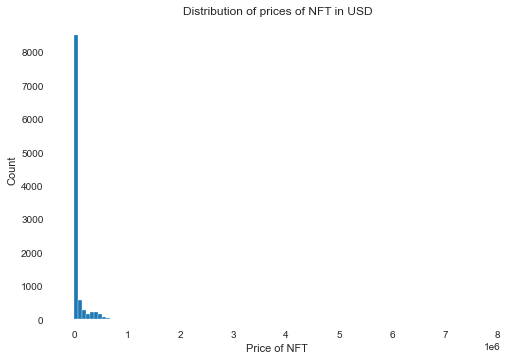

In [220]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),bins='sqrt')
plt.title("Distribution of prices of NFT in USD")
plt.ylabel("Count")
plt.xlabel("Price of NFT")

Text(0.5, 0, 'Price of NFT')

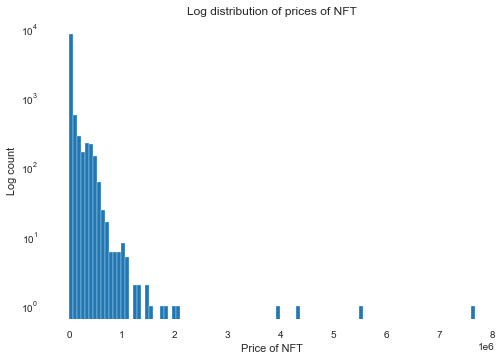

In [221]:
plt.hist((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))),log=True,bins='sqrt')
plt.title("Log distribution of prices of NFT")
plt.ylabel("Log count")
plt.xlabel("Price of NFT")

Text(0.5, 0, 'Price of NFT')

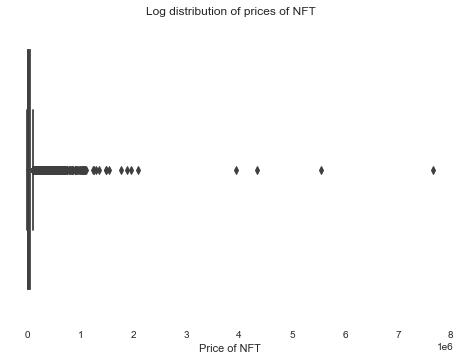

In [222]:
sns.boxplot((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))))
plt.title("Log distribution of prices of NFT")
plt.xlabel("Price of NFT")

Text(0.5, 0, 'Price of NFT')

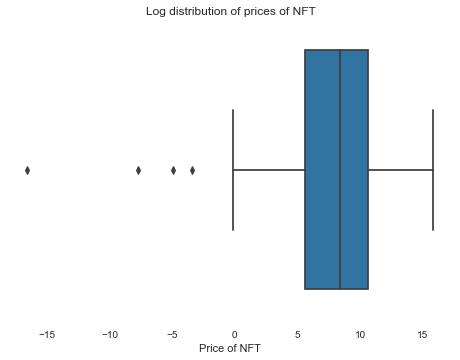

In [223]:
sns.boxplot(np.log(df.eth_price*pd.to_numeric(df.usd_price)*10**(-18)))
plt.title("Log distribution of prices of NFT")
plt.xlabel("Price of NFT")

Text(0.5, 1.0, 'ETH-USD price over time')

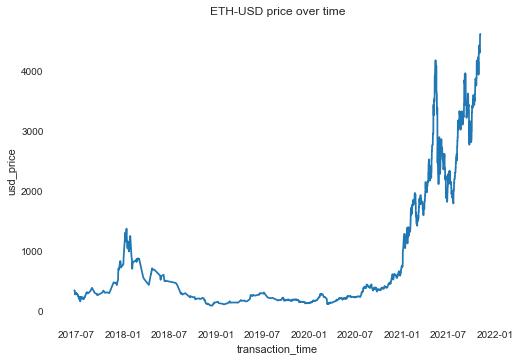

In [215]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_price))
plt.title("ETH-USD price over time")

Text(0.5, 1.0, 'ETH-USD volume over time')

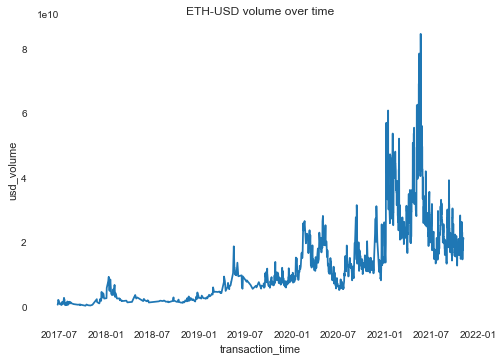

In [219]:
sns.lineplot(df.transaction_time,pd.to_numeric(df.usd_volume))
plt.title("ETH-USD volume over time")

Text(0, 0.5, 'Log prices of NFT')

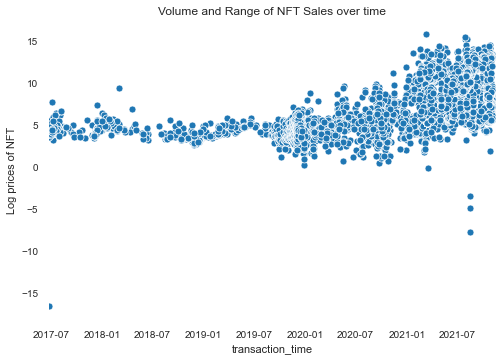

In [235]:
sns.scatterplot(df.transaction_time,np.log((df.eth_price*pd.to_numeric(df.usd_price)*10**(-float(df.eth_price_decimal.head(1)))))).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")

Text(0, 0.5, 'Log prices of NFT')

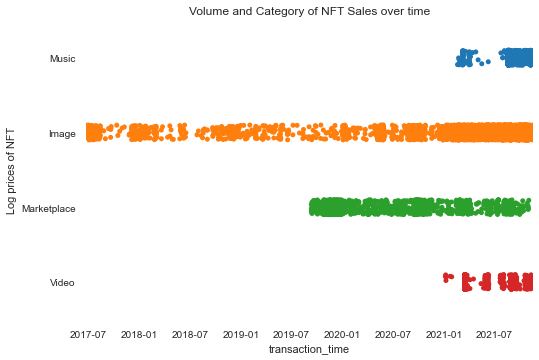

In [302]:
sns.stripplot(y=df.Category,x=df.transaction_time).set(xlim=(df.transaction_time.min(),df.transaction_time.max()))
plt.title("Volume and Category of NFT Sales over time")
plt.ylabel("Log prices of NFT")

# Image and Video Data Visualisation

In [181]:
from PIL import Image
from collections import Counter
import cv2

image_resolution = Counter()
video_resolution = Counter()
video_fps = Counter()
video_duration = Counter()


Image.MAX_IMAGE_PIXELS = 1000000000 

def media_data_extractor(string, image_resolution, video_resolution, video_fps, video_duration):
    """ Finds the relevant media data

    Image: Resolution
    Video: Resolution, FPS and duration

    """
    file_path = string.replace('tmp/','')
    if file_path.endswith("jpg"):
        img = Image.open(file_path)
        wid, hgt = img.size
        image_resolution.update({f"({wid},{hgt})":1})
    if file_path.endswith('mp4'):
        cap=cv2.VideoCapture(file_path)
        try:
            fps = round(cap.get(cv2.CAP_PROP_FPS))
            video_fps.update({f"({fps})":1})
        except:
            print(f"{file_path} unable to find fps")
        try:
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            video_resolution.update({f"({width},{height})":1})
        except:
            print(f"{file_path} unable to find resolution: {width},{height}")
        try:
            # rounded minute duration of each video
            duration = round(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))/float(cap.get(cv2.CAP_PROP_FPS))/60)
            video_duration.update({f"({duration})":1})
        except:
            print(f"{file_path} unable to find duration")
    return image_resolution, video_resolution, video_fps, video_duration
    

for value in df.media_filenames:
    if len(value) == 2:
        for string in value:
            image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(string,image_resolution, video_resolution, video_fps, video_duration)
    else:
        image_resolution, video_resolution, video_fps, video_duration = media_data_extractor(value,image_resolution, video_resolution, video_fps, video_duration)


In [182]:
def counter_to_graph(plotter,counter,column_name,title_name,min_count=20):

    image_resolution_df = pd.DataFrame(list(counter.items()))
    image_resolution_df.columns = [column_name,'Count']

    image_resolution_df = image_resolution_df.sort_values(['Count']).reset_index(drop=True)
    image_resolution_df = image_resolution_df.where(image_resolution_df['Count'] >= min_count).dropna()

    if plotter == sns.barplot:
        plotter(image_resolution_df["Count"],image_resolution_df[column_name],orient='h')
    else:
        plotter(x=image_resolution_df["Count"],labels=image_resolution_df[column_name])
    plt.title(title_name)

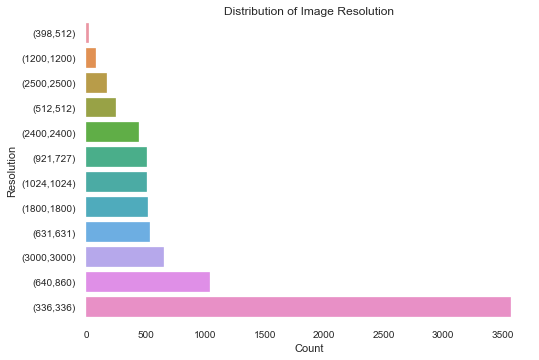

In [198]:
counter_to_graph(sns.barplot,image_resolution,column_name='Resolution',title_name='Distribution of Image Resolution',min_count=20)

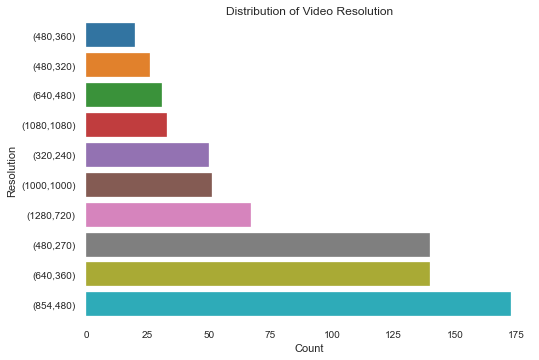

In [202]:
counter_to_graph(sns.barplot,video_resolution,column_name='Resolution',title_name='Distribution of Video Resolution',min_count=20)

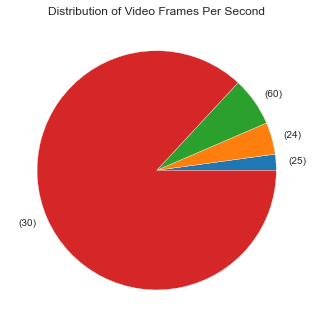

In [204]:
counter_to_graph(plt.pie,video_fps,column_name='Resolution',title_name='Distribution of Video Frames Per Second',min_count=3)

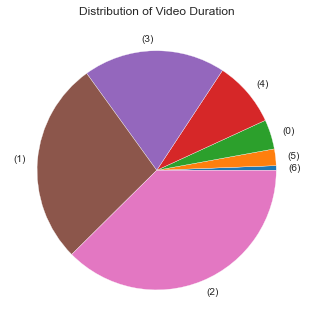

In [208]:
counter_to_graph(plt.pie,video_duration,column_name='Duration',title_name='Distribution of Video Duration',min_count=2)